In [36]:
import yfinance as yf
import pandas as pd

# Fetch historical data for Apple (AAPL)
ticker = "AAPL"
historical_data = yf.download(ticker, start="2023-01-01", end="2023-12-31")
print(historical_data.head())

# Display the first few rows of historical data (time series)
print("Time Series Data:")
print(historical_data.head())

# Display fundamental indicators
# all of these are available with the info attribute of Ticker in yfinance
# info is a dictionary with many details about the stock
# marketCap trailingPE and trailingEps are all keys in the dictionary
print("\nFundamental Indicators:")
print("Market Cap:", stock_data.info['marketCap']) # measure of the company's size and is often used to categorize companies (e.g., large-cap, mid-cap, small-cap).
print("Price-to-Earnings Ratio:", stock_data.info['trailingPE']) # It's calculated as Share Price / Earnings Per Share. A high P/E ratio could indicate that the stock is overvalued, or investors are expecting high growth rates in the future.
print("Earnings Per Share:", stock_data.info['trailingEps']) # calculated as Net Income / Total Shares Outstanding. It's a key indicator of a company's profitability.


[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2023-01-03 00:00:00+00:00  123.904617  125.070000  130.899994  124.169998   
2023-01-04 00:00:00+00:00  125.182610  126.360001  128.660004  125.080002   
2023-01-05 00:00:00+00:00  123.855095  125.019997  127.769997  124.760002   
2023-01-06 00:00:00+00:00  128.412231  129.619995  130.289993  124.889999   
2023-01-09 00:00:00+00:00  128.937286  130.149994  133.410004  129.889999   

Price                            Open     Volume  
Ticker                           AAPL       AAPL  
Date                                              
2023-01-03 00:00:00+00:00  130.279999  112117500  
2023-01-04 00:00:00+00:00  126.889999   89113600  
2023-01-05 00:00:00+00:00  127.129997   80962700  
2023-01-06 00:00:00+00:00  126.010002   87754700  
2023-01-09 00:00:00+00:00 

In [37]:
# Calculate daily returns based on adjusted closing prices
historical_data['Daily_Return'] = historical_data['Close'].pct_change()

# Statistical summary of daily returns
print("\nStatistical Summary of Daily Returns:")
print(historical_data['Daily_Return'].describe()) # describe outputs count mean std...

# Correlation between 'Close' price and 'Volume'
correlation = historical_data['Close'].corr(historical_data['Volume']) # corr outputs corr coeff - 1 and -1 are strong 0 is weak
# volume is number of shares traded
# + corr indicates strong demand when prices are increasing, as more people are buying the stock, which drives up both volume and price.
# - corr indicates selling pressure, where more investors are selling off their holdings, causing the price to drop as volume increases.
# 0 imply that price movements are relatively independent of trading volume, possibly due to a stable or balanced market without significant buying or selling pressure.
    # In such cases, other factors (like external news or broader market trends) may influence the stock's price more than its trading volume.
print("\nCorrelation between Close Price and Volume:", correlation)

# Identifying outliers in daily returns using 3 standard deviations
mean_return = historical_data['Daily_Return'].mean()
std_dev_return = historical_data['Daily_Return'].std()
outliers = historical_data[(historical_data['Daily_Return'] > mean_return + 3 * std_dev_return) |
                           (historical_data['Daily_Return'] < mean_return - 3 * std_dev_return)]
# | is logical or operator
print("\nOutliers in Daily Returns:\n", outliers[['Close', 'Daily_Return']])



Statistical Summary of Daily Returns:
count    249.000000
mean       0.001812
std        0.012566
min       -0.048020
25%       -0.006162
50%        0.001797
75%        0.008846
max        0.046927
Name: Daily_Return, dtype: float64


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

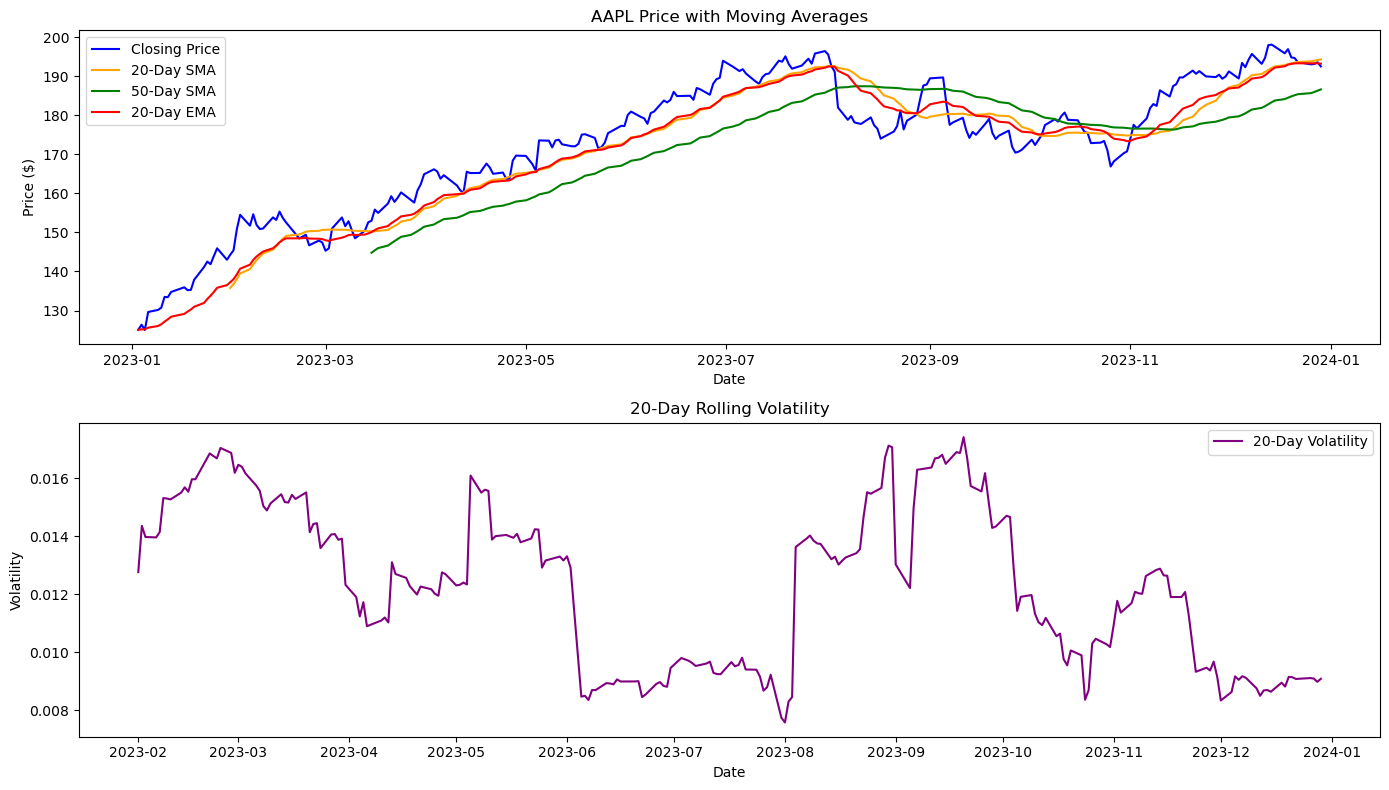

In [38]:
import matplotlib.pyplot as plt

# Calculate Simple Moving Averages (SMA)
# Simple Moving Averages (SMAs) are a type of moving average that helps smooth out 
# fluctuations in a time series, such as stock prices, to identify trends more easily. 
# They are calculated by taking the average of a set number of past data points 
# (e.g., closing prices) over a specified period.

# An Exponential Moving Average (EMA) is a type of moving average that places more weight 
# on recent data points, making it more responsive to new information than a simple moving average 
# (SMA). Unlike a simple moving average, where each data point within the window has equal weight, 
# an EMA gives more importance to recent prices while diminishing the weight of older prices exponentially.
# EWMA is essentially the same thing but used more for voalatility estimation
historical_data['SMA_20'] = historical_data['Close'].rolling(window=20).mean()
historical_data['SMA_50'] = historical_data['Close'].rolling(window=50).mean()

# Calculate Exponential Moving Average (EMA)
# With adjust=False: Only the previous EMA and the current data point are used to calculate the new EMA, 
# which can make it faster and more efficient, especially on large datasets or in real-time processing.
historical_data['EMA_20'] = historical_data['Close'].ewm(span=20, adjust=False).mean()

# Daily Returns is the pct change of close
# Calculate daily volatility (standard deviation of daily returns)
historical_data['Daily_Volatility'] = historical_data['Daily_Return'].rolling(window=20).std()

# Plot closing price along with moving averages and daily volatility
plt.figure(figsize=(14, 8))

# Subplot for Closing Price and Moving Averages
plt.subplot(2, 1, 1)
plt.plot(historical_data.index, historical_data['Close'], label="Closing Price", color="blue")
plt.plot(historical_data.index, historical_data['SMA_20'], label="20-Day SMA", color="orange")
plt.plot(historical_data.index, historical_data['SMA_50'], label="50-Day SMA", color="green")
plt.plot(historical_data.index, historical_data['EMA_20'], label="20-Day EMA", color="red")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title(f"{ticker} Price with Moving Averages")
plt.legend()

# Subplot for Daily Volatility
plt.subplot(2, 1, 2)
plt.plot(historical_data.index, historical_data['Daily_Volatility'], label="20-Day Volatility", color="purple")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("20-Day Rolling Volatility")
plt.legend()

plt.tight_layout()
plt.show()
